<a href="https://colab.research.google.com/github/JS0501/ESAA_OB/blob/main/ESAA0901.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **개념 정리**

### **1. 정규 방정식 / 계산 복잡도**
#### 비용 함수를 최소화하는 쎄타값을 찾기 위한 해석적인 방법, 즉 바로 결과를 얻을 수 있는 수학 공식
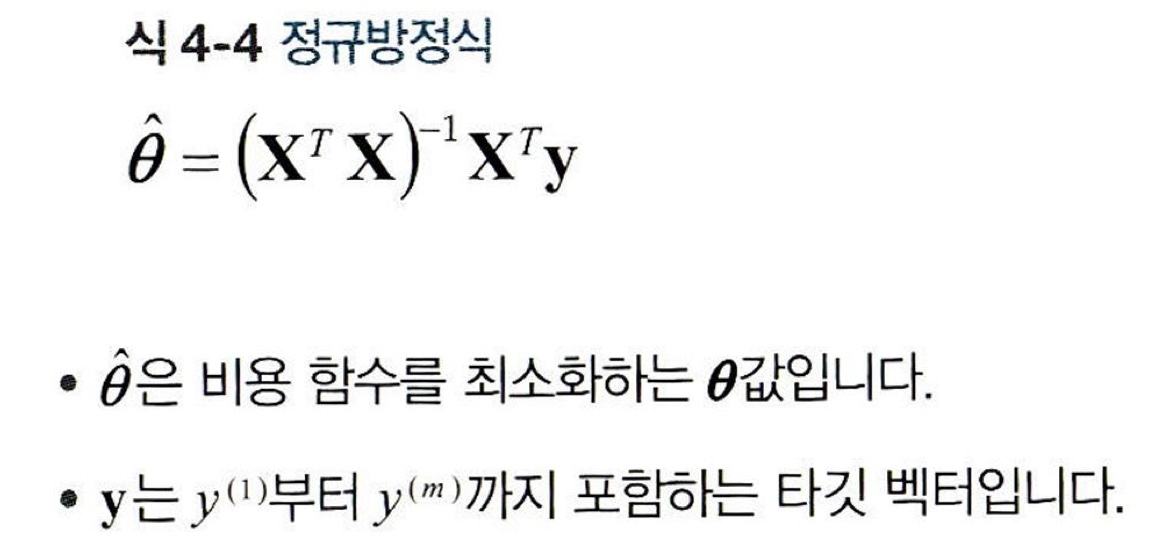

#### 정규 방정식은 (n+1)x(n+1) 크기의 XtX 역행렬을 계산 (n: 특성 수)
#### 역행렬을 계산하는 계산 복잡도는 일반적으로 O(n2.4)에서 O(n3) 사이
#### -> 특성 수가 두 배로 늘어나면 계산 시간이 대략 2의 2.4승=5.3에서 2의 3승=8배로 증가

### **2. 경사 하강법**
#### 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘
#### 비용 함수를 최소화하기 위해 반복해서 파라미터 조정
#### 파라미터 벡터 쎄타에 대해 비용 함수의 현재 gradient 계산 후 gradient가 감소하는 방향으로 진행. gradient가 0이 되면 최솟값에 도달한 것
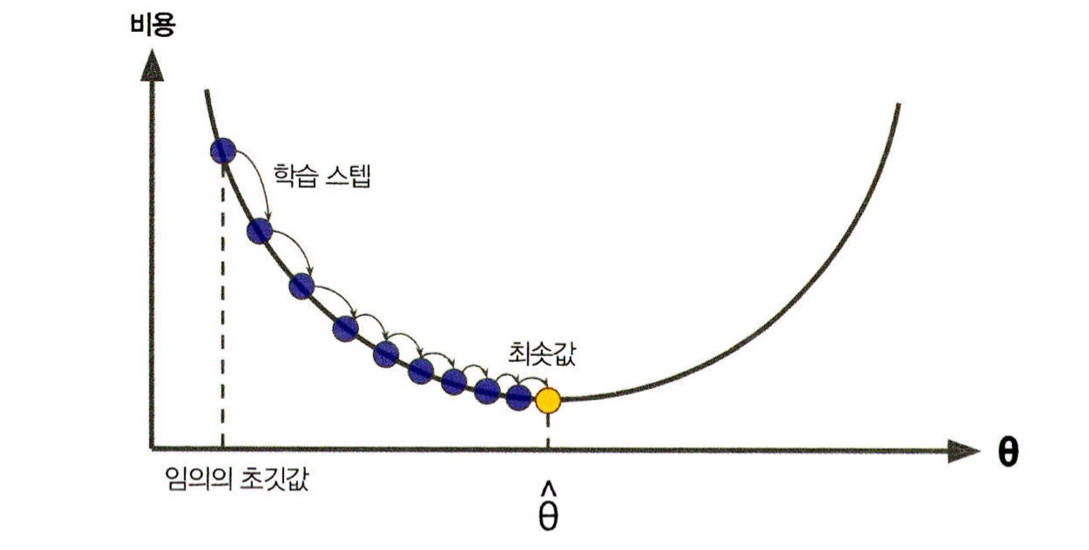


#### 경사 하강법의중요한 파라미터는 스텝의 크기, 즉 학습률(learning rate)
#### 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸림
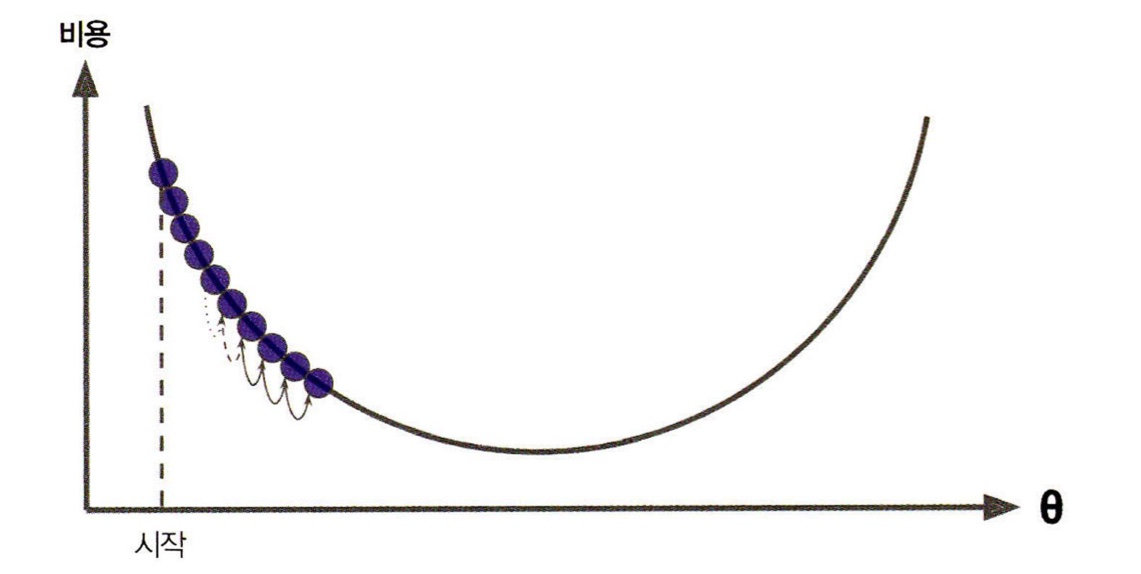


#### 한편 학습률이 너무 크면 골짜기를 가로질러 반대편으로 건너뛰게 되어 이전보다 더 높은 곳으로 올라갈 수 있음
#### 이는 알고리즘을 더 큰 값으로 발산하게 만들어 적절한 해법을 찾지 못하게 함

### **3. 미니배치 경사 하강법**
#### 각 스텝에서 전체 훈련 세트(배치 경사 하강법)나 하나의 샘플(확률적 경사 하강법)을 기반으로 gradient를 계산하는 것이아니라 **미니배치**라 부르는 임의의 작은 샘플에 대해 gradient 계산
#### 장점) 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상
#### 미니배치를 어느 정도 크게 하면 이 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하게 움직임
#### 결국 미니배치 경사하강법이 SGD보다 최솟값에 더 가까이 도달하게 될 것
#### 하지만 지역 최솟값에서 빠져나오기는 더 힘들 수 있음
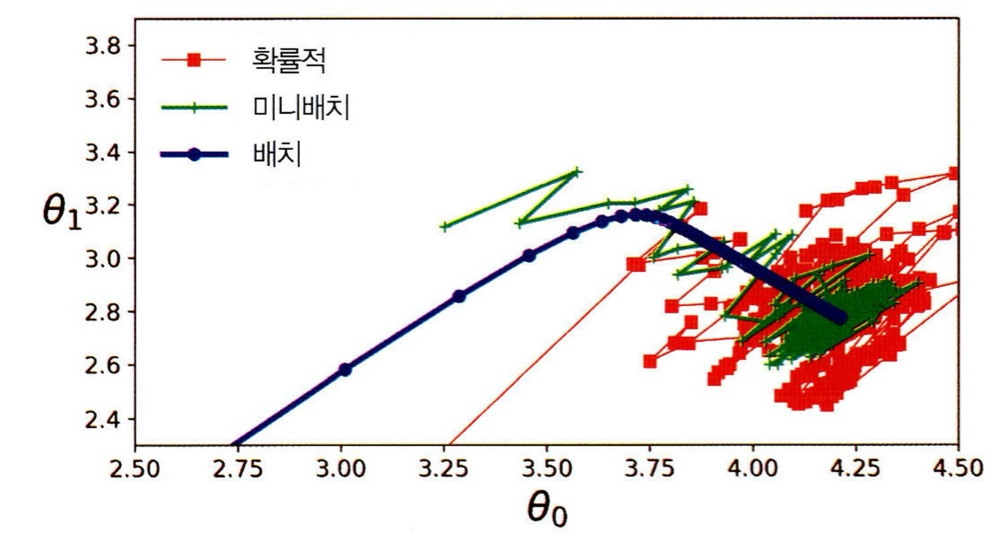

#### 위 그림은 세 가지 경사 하강법 알고리즘이 훈련 과정 동안 파라미터 공간에서 움직인 경로
#### 모두 최솟값 근처에 도달했지만 배치 경사 하강법의 경로가 실제로 최솟값에서 멈춘 반면, 확률적 경사 하강법과 미니배치 경사 하강법은 근처에서 맴돌고 있음
#### 그러나 배치 경사 하강법은 매 스텝에서 많은 시간이 소요됨
#### 또한 확률적 경사 하강법과 미니배치 경사 하강법도 적절한 학습 스케줄을 사용하면 최솟값에 도달함

## **코드 필사**

In [2]:
import numpy as np

X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

In [4]:
X_b = np.c_[np.ones((100,1)),X] # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
>>> theta_best

array([[4.41419997],
       [2.74127623]])

In [6]:
>>> X_new = np.array([[0],[2]])
>>> X_new_b = np.c_[np.ones((2,1)),X_new] # 모든 샘플에 x0 = 1을 추가합니다.
>>> y_predict = X_new_b.dot(theta_best)
>>> y_predict

array([[4.41419997],
       [9.89675243]])

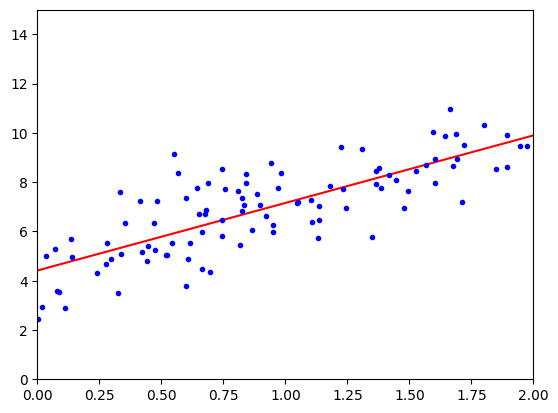

In [7]:
import matplotlib.pyplot as plt

plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [8]:
>>> from sklearn.linear_model import LinearRegression
>>> lin_reg = LinearRegression()
>>> lin_reg.fit(X,y)
>>> lin_reg.intercept_, lin_reg.coef_

(array([4.41419997]), array([[2.74127623]]))

In [9]:
>>> lin_reg.predict(X_new)

array([[4.41419997],
       [9.89675243]])

In [10]:
>>> theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y,rcond=1e-6)
>>> theta_best_svd

array([[4.41419997],
       [2.74127623]])

In [11]:
>>> np.linalg.pinv(X_b).dot(y)

array([[4.41419997],
       [2.74127623]])

In [12]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta*gradients

In [13]:
>>> theta

array([[4.41419997],
       [2.74127623]])

In [14]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1) # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch*m+i)
    theta = theta - eta*gradients

In [15]:
>>> theta

array([[4.42912226],
       [2.70158389]])

In [16]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [17]:
>>> sgd_reg.intercept_, sgd_reg.coef_

(array([4.45597265]), array([2.826678]))

In [ ]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [ ]:
>>> from sklearn.preprocessing import PolynomialFeatures
>>> poly_features = PolynomialFeatures(degree=2, include_bias=False)
>>> X_poly = poly_features.fit_transform(X)
>>> X[0]

array([1.3534678])

In [ ]:
>>> X_poly[0]

array([1.3534678 , 1.83187509])

In [ ]:
>>> lin_reg = LinearRegression()
>>> lin_reg.fit(X_poly,y)
>>> lin_reg.intercept_, lin_reg.coef_

(array([1.97895666]), array([[0.9900831 , 0.51027944]]))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
  X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m],y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
  plt.plot(np.sqrt(train_errors),'r-+', linewidth=2, label = '훈련 세트')
  plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label = '검증 세트')

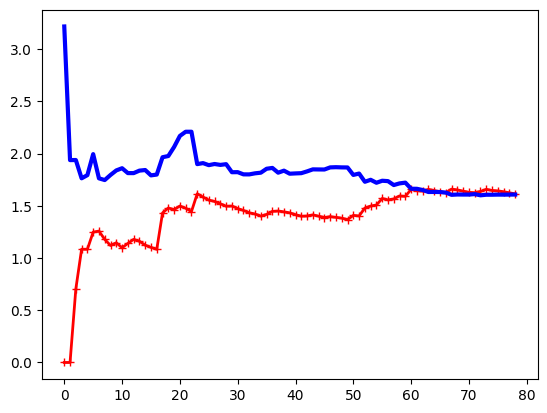

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

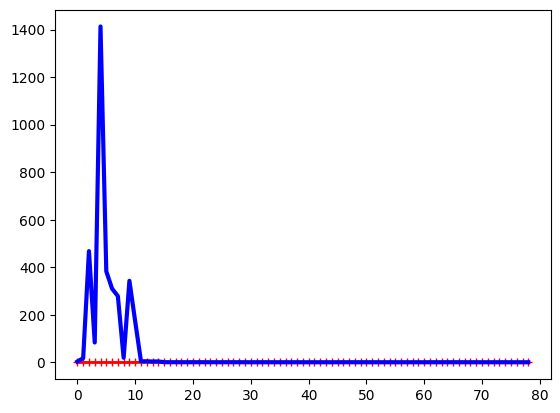

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression,X,y)